In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

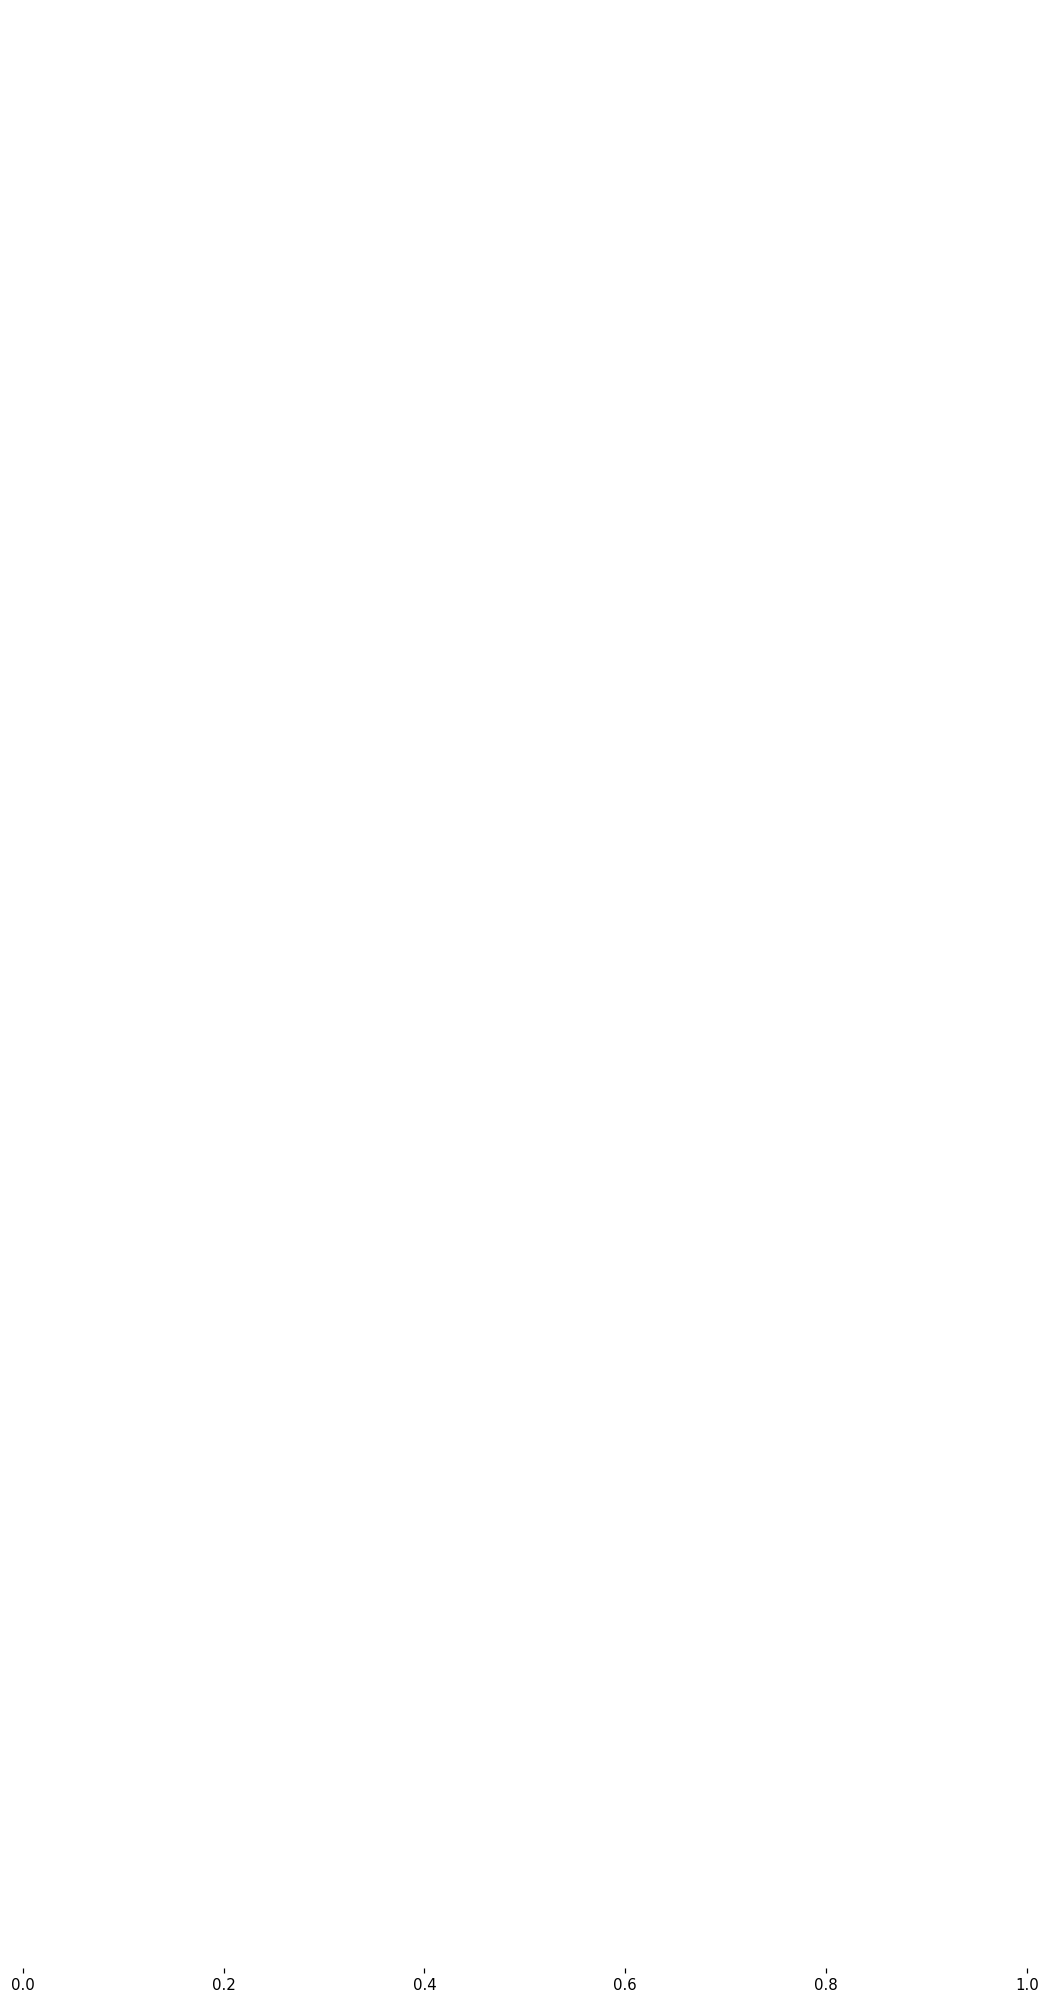

In [57]:
plt.rcParams['figure.figsize'] = [12, 24]
plt.rcParams['figure.dpi'] = 72*1.5
plt.tick_params(left=False, labelleft=False) #remove ticks and labels on Yo
plt.box(False)


In [3]:
raw_data = pd.read_csv('data/usnames.csv')
raw_data
ldata = raw_data.copy()[raw_data['Year'] >= 1930]
ldata.head()

,Name,F,M,Year
248275,Aaron,6,500,1930
248276,Abbie,77,16,1930
248277,Abbott,0,5,1930
248278,Abby,16,0,1930
248279,Abdul,0,7,1930


In [9]:
ldata['all'] = ldata['F'] + ldata['M']
byname = ldata.groupby('Name').sum().reset_index().sort_values('all', ascending=False)

In [12]:
byname['diff'] = abs(byname['F'] - byname['M'])
byname.head(100)

,Name,F,M,Year,all,diff
57075,Michael,21060,4196195,163593,4217255,4175135
34664,James,17672,4119971,163593,4137643,4102299
67662,Robert,15297,3881162,163593,3896459,3865865
38727,John,14774,3867364,163593,3882138,3852590
19369,David,12012,3396448,163593,3408460,3384436
...,...,...,...,...,...,...
13215,Carolyn,517022,1555,163593,518577,515467
22058,Diane,514271,1386,163593,515657,512885
39348,Jose,3799,510412,163593,514211,506613
821,Adam,1979,511657,163593,513636,509678


In [55]:
smalldiffs = byname[:1500].copy()
smalldiffs['score'] = smalldiffs['diff'] / smalldiffs['all']
smalldiffs = smalldiffs.sort_values('score', ascending=True)
smalldiffs[:30]

ambig = list(smalldiffs[:50]['Name'])
ambig

['Kerry',
 'Kris',
 'Amari',
 'Jessie',
 'Blair',
 'Riley',
 'Justice',
 'Jackie',
 'Carey',
 'Robbie',
 'Peyton',
 'Emerson',
 'Jaime',
 'Elisha',
 'Casey',
 'Stevie',
 'Kendall',
 'Harley',
 'Reese',
 'Ollie',
 'Sage',
 'Pat',
 'Frankie',
 'Avery',
 'Jody',
 'Marion',
 'Skyler',
 'Payton',
 'Quinn',
 'Gale',
 'Rene',
 'Angel',
 'Tommie',
 'Darian',
 'Johnnie',
 'Dominique',
 'Ali',
 'Sidney',
 'Gerry',
 'Skylar',
 'Jan',
 'Merle',
 'Kristian',
 'Guadalupe',
 'Jordan',
 'Jaiden',
 'Kasey',
 'Taylor',
 'Paris',
 'Ashton']

In [5]:
# plotname = 'Jackie'
# fem = np.array(ldata[ldata['Name'] == plotname]['F'])
# mal = np.array(ldata[ldata['Name'] == plotname]['M'])
# years = np.array(ldata[ldata['Name'] == plotname]['Year'])
# plt.bar(years, fem, color = 'xkcd:sage', width = 1)
# plt.bar(years, -mal, color = 'xkcd:light grey blue', width = 1)

# plt.text(1900, 500, 'female', horizontalalignment='left', verticalalignment='center')
# plt.text(1900, -500, 'male', horizontalalignment='left', verticalalignment='center')

# plt.show()

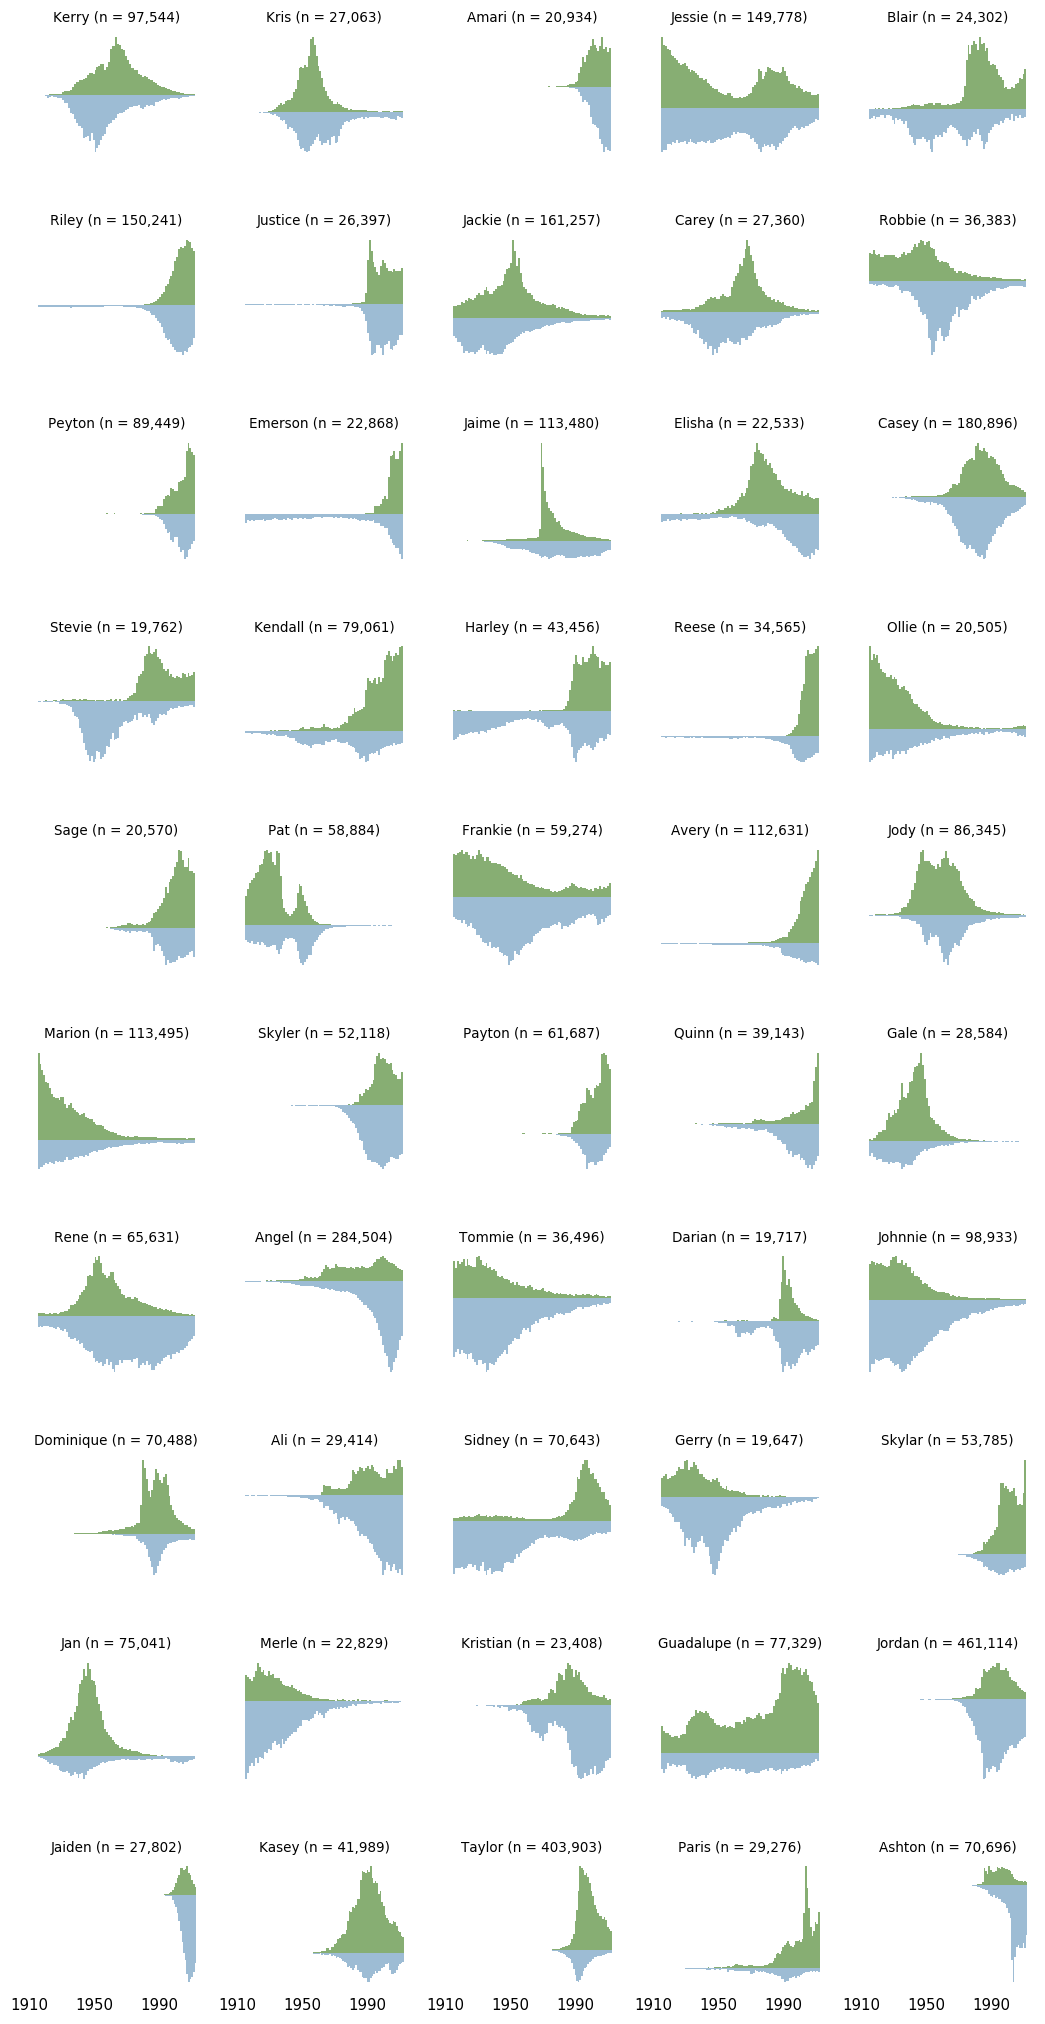

In [58]:
plot_rows = 10
plot_cols = 5
small_multiples_fig, axes = plt.subplots(
    plot_rows, 
    plot_cols, 
    subplot_kw=dict(),
    sharex='col', 
    facecolor='w'
)
# https://stackoverflow.com/questions/20057260/
small_multiples_fig.subplots_adjust(
    hspace=0.6, 
    wspace=0.2
)

plotnames_iter = iter(ambig)
for subrow in range(plot_rows):
    for subcol in range(plot_cols):
        plotname = next(plotnames_iter)

        fem = np.array(ldata[ldata['Name'] == plotname]['F'])
        mal = np.array(ldata[ldata['Name'] == plotname]['M'])
        years = np.array(ldata[ldata['Name'] == plotname]['Year'])

        ax = axes[subrow, subcol]
        ax.bar(years, fem, color = 'xkcd:sage', width = 1)
        ax.bar(years, -mal, color = 'xkcd:light grey blue', width = 1)
        ax.set_title(
            f'{plotname} (n = {fem.sum() + mal.sum():,})', 
            fontsize=9
        )

#         ax.get_yaxis().set_major_formatter(
#             matplotlib.ticker.FuncFormatter(
#                 lambda x, p: format(abs(int(x)), ',')
#             )
#         )
        # https://stackoverflow.com/questions/2176424/
        ax.get_yaxis().set_visible(False)
        ax.get_xaxis().set_ticks([1910, 1950, 1990])
        [s.set_visible(False) for s in ax.spines.values()]
        [t.set_visible(False) for t in ax.get_xticklines()]
#         [t.set_visible(False) for t in ax.get_yticklines()]

# small_multiples_fig.show() #  ipython autodisplays